In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
print(df.shape)

(150, 6)


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

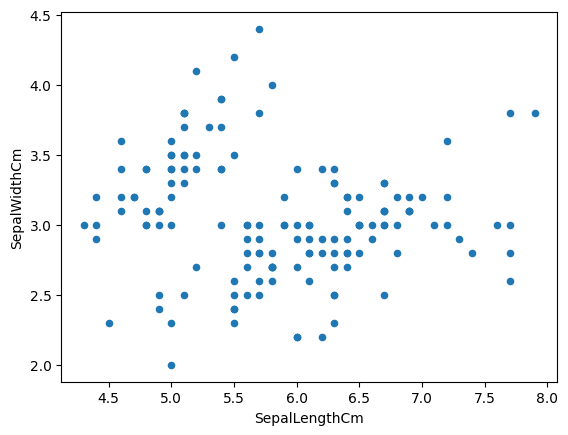

In [15]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

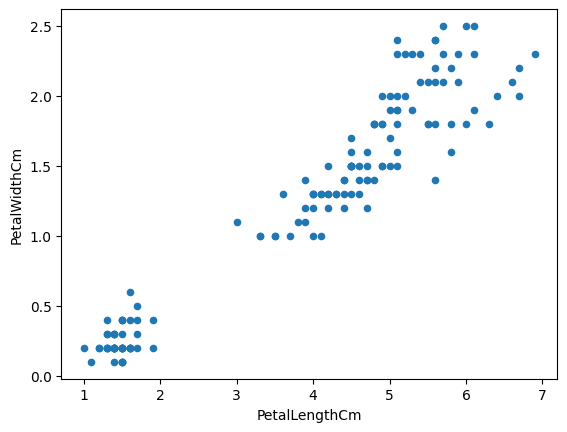

In [18]:
df.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

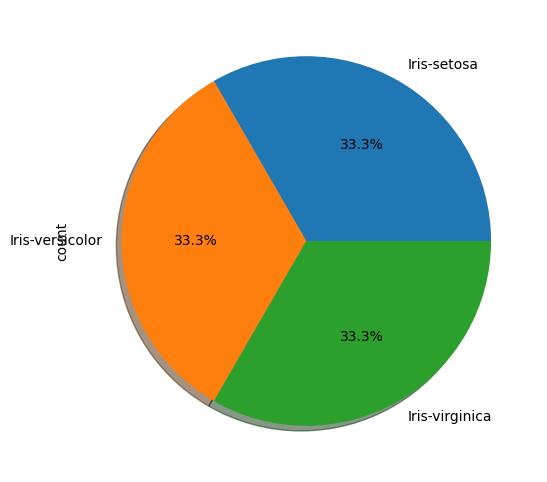

In [23]:
species_counts = df['Species'].value_counts()
plt.figure(figsize=(18, 6))
species_counts.plot.pie(explode=[0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()

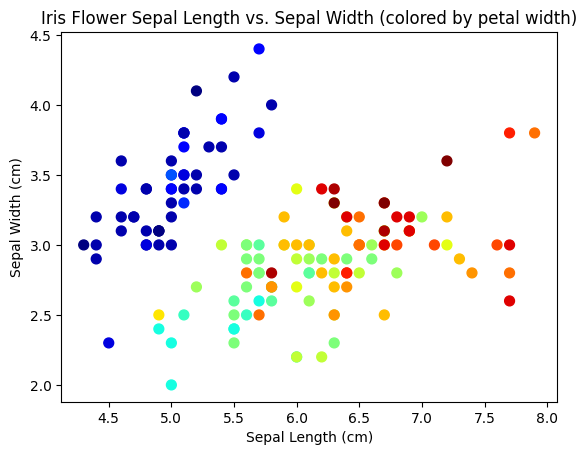

In [22]:
import matplotlib.cm as cm

cmap = cm.jet

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['PetalWidthCm'], cmap=cmap, s=50)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Flower Sepal Length vs. Sepal Width (colored by petal width)')

plt.show()


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

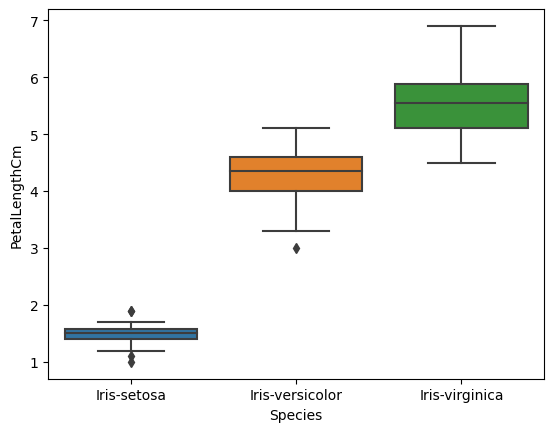

In [25]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

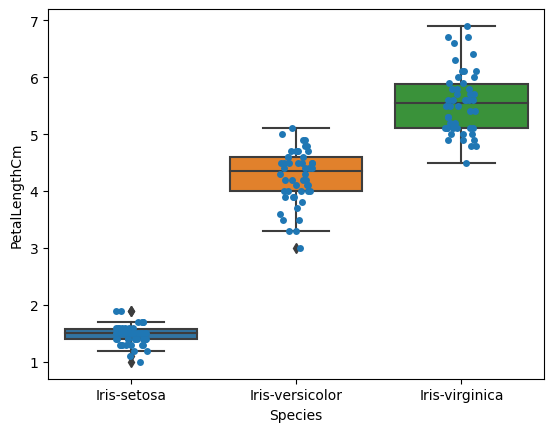

In [26]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

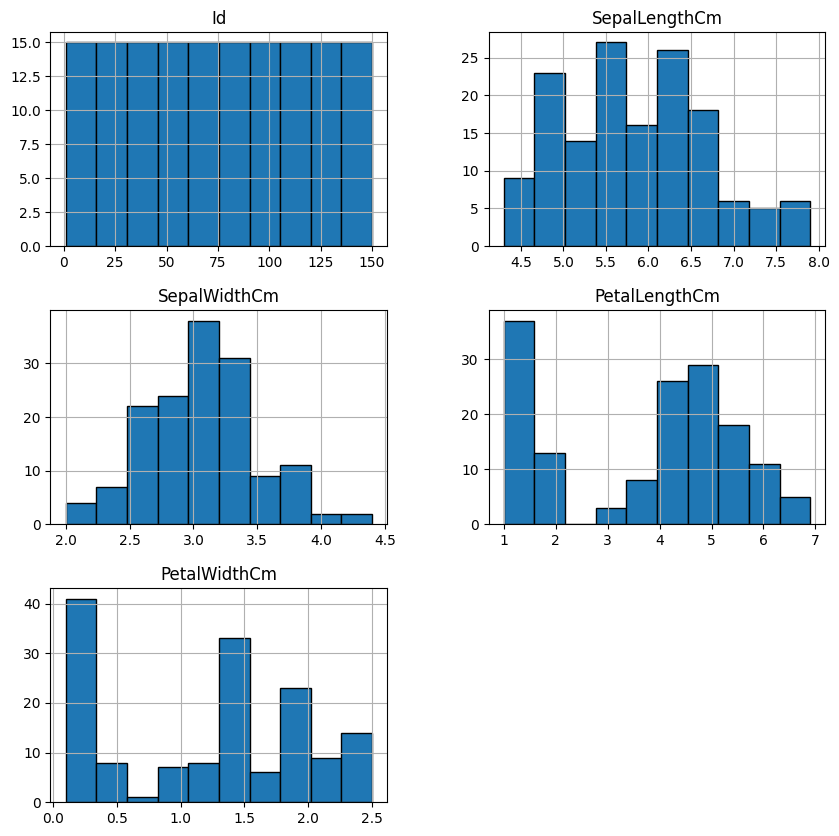

In [27]:
df.hist(edgecolor='black',figsize=(10,10))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


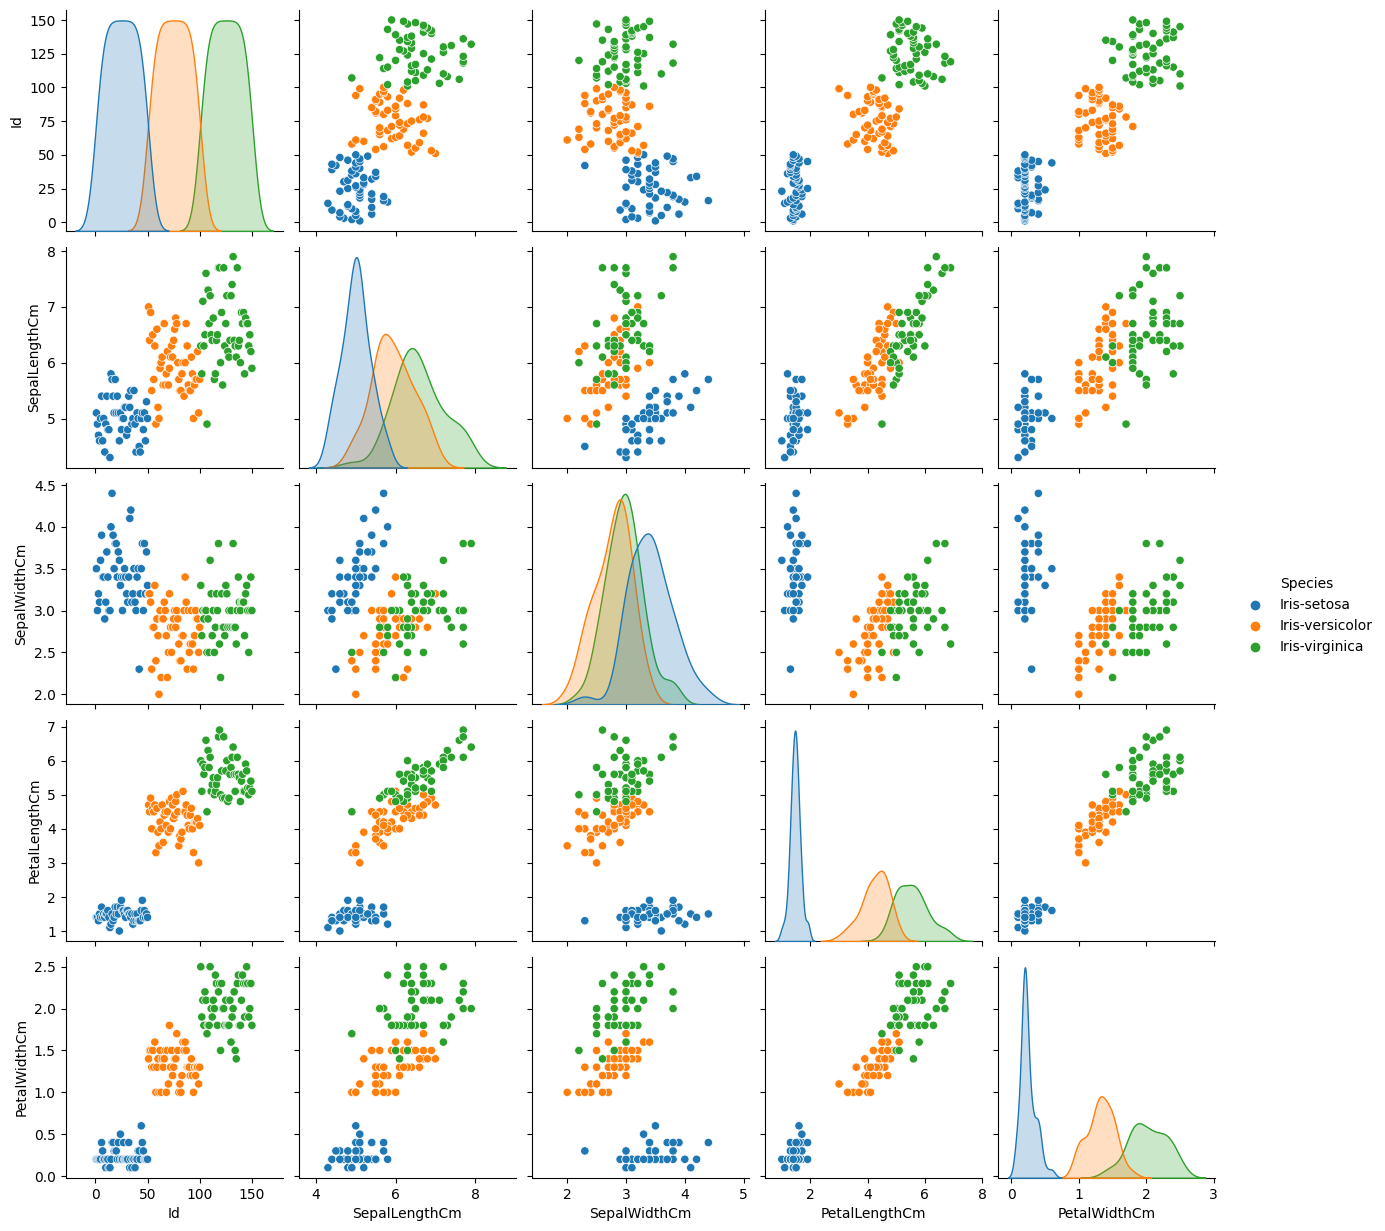

In [28]:
sns.pairplot(df , hue='Species');

In [9]:
from sklearn.model_sabselection import train_test_split
from sklearn.svm import SVC

In [10]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
classification_model = SVC()
classification_model.fit(X_train, y_train)

y_pred = classification_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


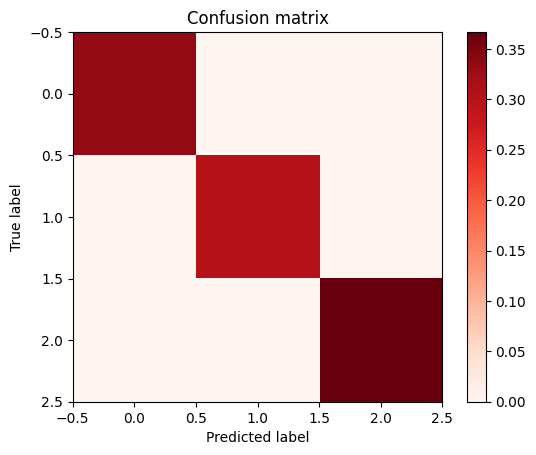

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / np.sum(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm_norm, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix')

cbar = plt.colorbar(im)

plt.show()


In [12]:
n1 = np.array([4.6, 3.1, 1.5, 0.2])

species_prediction = classification_model.predict([n1])

print('Predicted species:', species_prediction[0])

Predicted species: Iris-setosa


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [13]:
n2 = np.array([7.0, 3.2, 4.7, 1.4])

species_prediction = classification_model.predict([n2])

print('Predicted species:', species_prediction[0])

Predicted species: Iris-versicolor


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
n1 = np.array([6.4, 3.2, 5.3, 2.3])

species_prediction = classification_model.predict([n1])

print('Predicted species:', species_prediction[0])

Predicted species: Iris-virginica


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
